# Correlation and Dependency

Finding links between variables is a very important task. The main purpose of data science is to find relationships between variables, and to understand how these relationships can help us make better decisions. 

Machine learning models are also sensitive to the number of variables and how they relate and affect each other, so finding correlations and dependencies can help us make better use of our machine learning algorithms.

Let's use the <a href="../../../data/churn.csv">Telco Churn dataset</a> to understand how we can find links between different variables in VerticaPy.

,AbccustomerIDVarchar(20),AbcgenderVarchar(20),123SeniorCitizenInteger,010PartnerBoolean,010DependentsBoolean,123tenureInteger,010PhoneServiceBoolean,AbcMultipleLinesVarchar(100),AbcInternetServiceVarchar(22),AbcOnlineSecurityVarchar(38),AbcOnlineBackupVarchar(38),AbcDeviceProtectionVarchar(38),AbcTechSupportVarchar(38),AbcStreamingTVVarchar(38),AbcStreamingMoviesVarchar(38),AbcContractVarchar(28),010PaperlessBillingBoolean,AbcPaymentMethodVarchar(50),123MonthlyChargesNumeric(10),123TotalChargesNumeric(11),010ChurnBoolean
1,0002-ORFBO,Female,0,✅,✅,9,✅,No,DSL,No,Yes,No,Yes,Yes,No,One year,✅,Mailed check,65.6,593.3,❌
2,0003-MKNFE,Male,0,❌,❌,9,✅,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,❌,Mailed check,59.9,542.4,❌
3,0004-TLHLJ,Male,0,❌,❌,4,✅,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,✅,Electronic check,73.9,280.85,✅
4,0011-IGKFF,Male,1,✅,❌,13,✅,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,✅,Electronic check,98.0,1237.85,✅
5,0013-EXCHZ,Female,1,✅,❌,3,✅,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,✅,Mailed check,83.9,267.4,✅
6,0013-MHZWF,Female,0,❌,✅,9,✅,No,DSL,No,No,No,Yes,Yes,Yes,Month-to-month,✅,Credit card (automatic),69.4,571.45,❌
7,0013-SMEOE,Female,1,✅,❌,71,✅,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,✅,Bank transfer (automatic),109.7,7904.25,❌
8,0014-BMAQU,Male,0,✅,❌,63,✅,Yes,Fiber optic,Yes,No,No,Yes,No,No,Two year,✅,Credit card (automatic),84.65,5377.8,❌
9,0015-UOCOJ,Female,1,❌,❌,7,✅,No,DSL,Yes,No,No,No,No,No,Month-to-month,✅,Electronic check,48.2,340.35,❌
10,0016-QLJIS,Female,0,✅,✅,65,✅,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,✅,Mailed check,90.45,5957.9,❌

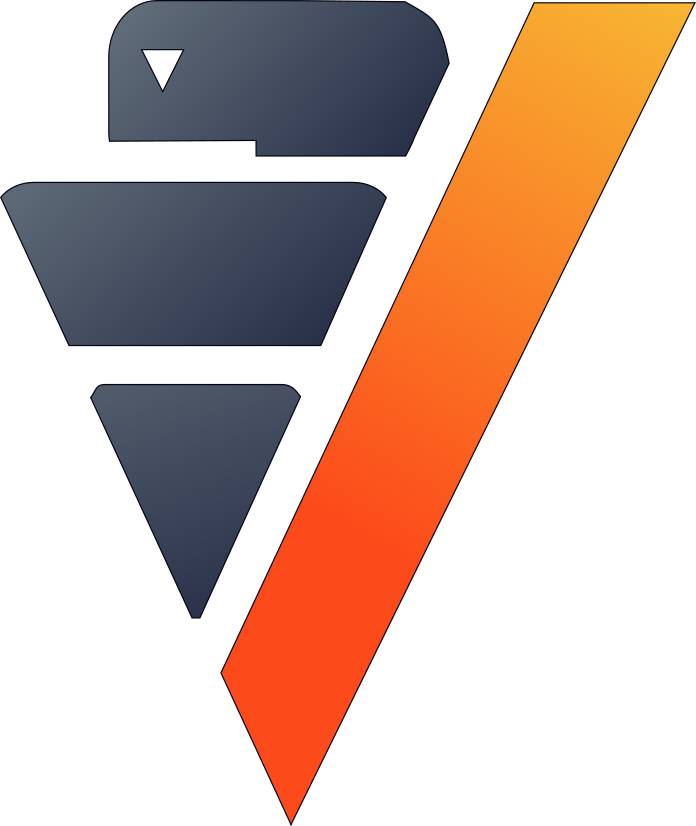

In [21]:
import verticapy as vp

vdf = vp.read_csv("data/churn.csv")
display(vdf)

The Pearson correlation coefficient is a very common correlation function. In this case, it helped us to find linear links between the variables. Having a strong Pearson relationship means that the two input variables are linearly correlated.

In [2]:
vdf.corr(method = "pearson")

We can see that 'tenure' is well-correlated to the 'TotalCharges', which makes sense.

In [3]:
vdf.scatter(["tenure", "TotalCharges"])

In [4]:
vdf.corr(["tenure", "TotalCharges"], method = "pearson")

0.825880460933202

Note, however, that having a low Pearson relationship imply that the variables aren't correlated. For example, let's compute the Pearson correlation coefficient between 'tenure' and 'TotalCharges' to the power of 20.

In [5]:
vdf["TotalCharges^20"] = vdf["TotalCharges"] ** 20
vdf.scatter(["tenure", "TotalCharges^20"])

In [6]:
vdf.corr(["tenure", "TotalCharges^20"], method = "pearson")

0.224994408804537

We know that the 'tenure' and 'TotalCharges' are strongly linearly correlated. However we can notice that the correlation between the 'tenure' and 'TotalCharges' to the power of 20 is not very high. Indeed, the Pearson correlation coefficient is not robust for monotonic relationships, but rank-based correlations are. Knowing this, we'll calculate the Spearman's rank correlation coefficient instead.

,"""SeniorCitizen""","""Partner""","""Dependents""","""tenure""","""PhoneService""","""PaperlessBilling""","""MonthlyCharges""","""TotalCharges""","""Churn""","""TotalCharges^20"""
"""SeniorCitizen""",1.0,0.0164786575974139,-0.211185088493958,0.0190767898701152,0.00857640107927944,0.156529559311173,0.221092529102162,0.105795342303725,0.150889328176473,0.105795342303725
"""Partner""",0.0164786575974139,1.0,0.452676282929464,0.384665710284119,0.017705663223972,-0.014876622287891,0.108410945895981,0.343930553215626,-0.150447544959177,0.343930553215626
"""Dependents""",-0.211185088493958,0.452676282929464,1.0,0.164485741353804,-0.00176167854468371,-0.111377229193644,-0.107082725586711,0.0866797760484616,-0.164221401579725,0.0866797760484616
"""tenure""",0.0190767898701152,0.384665710284119,0.164485741353804,1.0,0.00815081986907184,0.00792876239476321,0.276342245223708,0.883103368818293,-0.369620778763435,0.883103368818293
"""PhoneService""",0.00857640107927944,0.017705663223972,-0.00176167854468371,0.00815081986907184,1.0,0.0165048057325697,0.238826410230016,0.0838048547856037,0.0119419800290031,0.0838048547856037
"""PaperlessBilling""",0.156529559311173,-0.014876622287891,-0.111377229193644,0.00792876239476321,0.0165048057325697,1.0,0.346158879381323,0.151669712799097,0.191825331666468,0.151669712799097
"""MonthlyCharges""",0.221092529102162,0.108410945895981,-0.107082725586711,0.276342245223708,0.238826410230016,0.346158879381323,1.0,0.633958405301206,0.184839285783758,0.633958405301206
"""TotalCharges""",0.105795342303725,0.343930553215626,0.0866797760484616,0.883103368818293,0.0838048547856037,0.151669712799097,0.633958405301206,1.0,-0.233211018585104,1.0
"""Churn""",0.150889328176473,-0.150447544959177,-0.164221401579725,-0.369620778763435,0.0119419800290031,0.191825331666468,0.184839285783758,-0.233211018585104,1.0,-0.233211018585104
"""TotalCharges^20""",0.105795342303725,0.343930553215626,0.0866797760484616,0.883103368818293,0.0838048547856037,0.151669712799097,0.633958405301206,1.0,-0.233211018585104,1.0

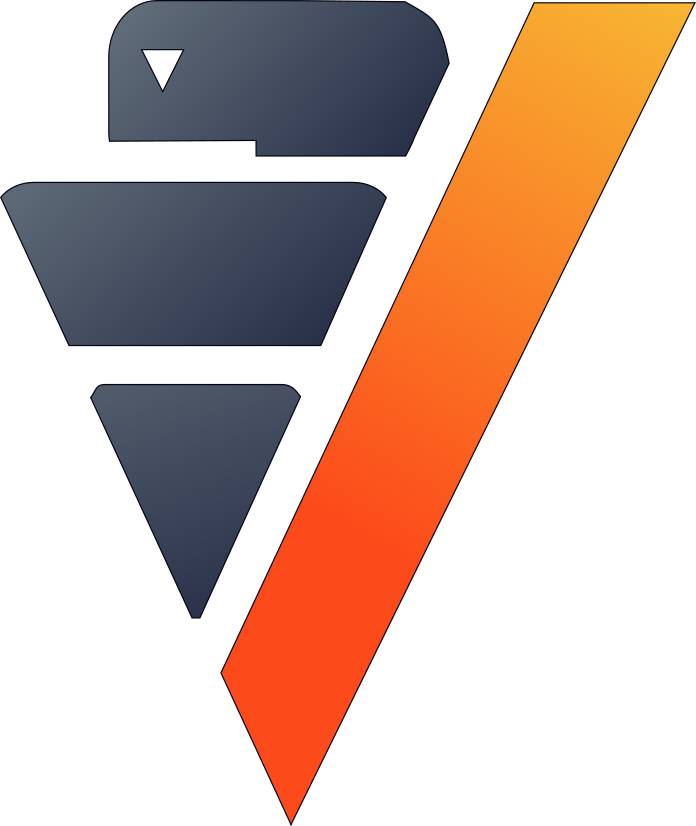

In [7]:
vdf.corr(method = "spearman", show = False)

In [8]:
vdf.corr(method = "spearman")

  0%|          | 0/9 [00:00<?, ?it/s]

The Spearman's rank correlation coefficient determines the monotonic relationships between the variables.

In [9]:
vdf.corr(["tenure", "TotalCharges^20"], method = "spearman")

0.883103368818293

We can notice that Spearman's rank correlation coefficient stays the same if one of the variables can be expressed using a monotonic function on the other. The same applies to Kendall rank correlation coefficient. 

In [10]:
vdf.corr(method = "kendall")

  0%|          | 0/9 [00:00<?, ?it/s]

Notice that the Kendall rank correlation coefficient will also detect the monotonic relationship.

In [11]:
vdf.corr(["tenure", "TotalCharges^20"], method = "kendall")

0.731699318287362

However, the Kendall rank correlation coefficient is very computationally expensive, so we'll generally use Pearson and Spearman when dealing with correlations between numerical variables. 

Binary features are considered numerical, but this isn't technically accurate. Since binary variables can only take two values, calculating correlations between a binary and numerical variable can lead to misleading results. To account for this, we'll want to use the 'Biserial Point' method to calculate the Point-Biserial correlation coefficient. This powerful method will help us understand the link between a binary variable and a numerical variable.

In [12]:
vdf.corr(method = "biserial")

  0%|          | 0/10 [00:00<?, ?it/s]

Lastly, we'll look at the relationship between categorical columns. In this case, the 'Cramer's V' method is very efficient. Since there is no position in the Euclidean space for those variables, the 'Cramer's V' coefficients cannot be negative (which is a sign of an opposite relationship) and they will range in the interval [0,1].

In [13]:
vdf.corr(method = "cramer")

  0%|          | 0/9 [00:00<?, ?it/s]

Sometimes, we just need to look at the correlation between a response and other variables. The parameter 'focus' will isolate and show us the specified correlation vector.

In [14]:
vdf.corr(method = "cramer", focus = "Churn")

Sometimes a correlation coefficient can lead to incorrect assumptions, so we should always look at the coefficient p-value.

In [15]:
vdf.corr_pvalue("Churn", "customerID", method = "cramer",)

(0.7810906445878953, 1.3659871749110484e-36)

We can see that churning correlates to the type of contract (monthly, yearly, etc.) which makes sense: you would expect that different types of contracts differ in flexibility for the customer, and particularly restrictive contracts may make churning more likely.

The type of internet service also seems to correlate with churning. Let's split the different categories to binaries to understand which services can influence the global churning rate.

In [16]:
vdf["InternetService"].one_hot_encode()
vdf.corr(method = "spearman", 
         focus = "Churn", 
         columns = ["InternetService_DSL", 
                    "InternetService_Fiber_optic"])

We can see that the Fiber Optic option in particular seems to be directly linked to a customer's likelihood to churn. Let's compute some aggregations to find a causal relationship.

,123InternetService_Fiber_opticInteger,123tenureFloat(22),123totalchargesFloat(22),123contract_month-to-monthFloat(22),123monthlychargesFloat(22)
1,0,31.9422346085635,1558.06548526423,0.442614644033443,43.7882442361287
2,1,32.9179586563307,3205.30457041344,0.68733850129199,91.5001291989664

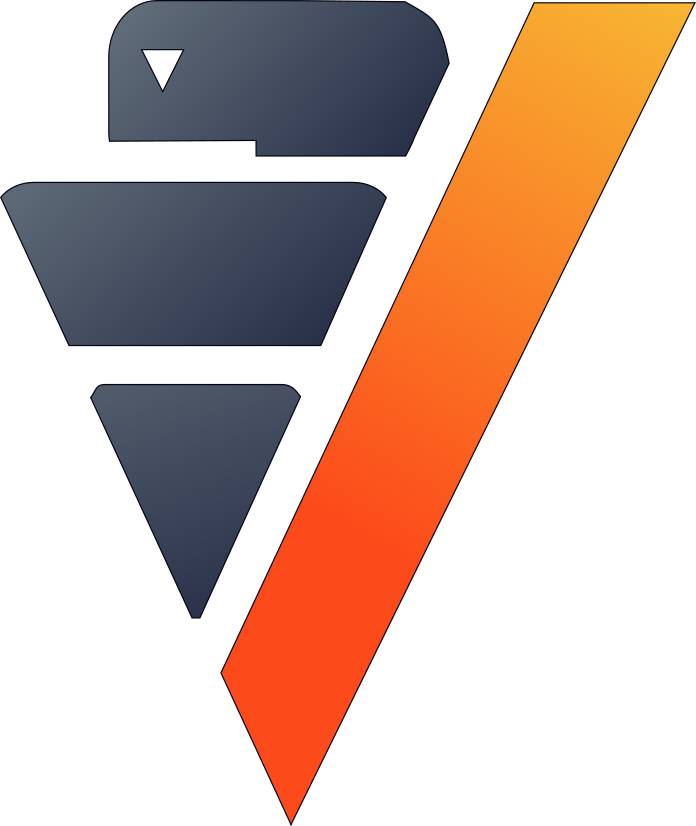

In [17]:
vdf["contract"].one_hot_encode()
vdf.groupby(["InternetService_Fiber_optic"], 
            ["AVG(tenure) AS tenure", 
             "AVG(totalcharges) AS totalcharges",
             'AVG("contract_month-to-month") AS "contract_month-to-month"',
             'AVG("monthlycharges") AS "monthlycharges"'])

It seems that users with the Fiber Optic option tend more to churn not because of the option itself, but probably because of the type of contracts and the monthly charges the users are paying to get it. Be careful when dealing with identifying correlations! Remember: correlation doesn't imply causation!

Another important type of correlation is the autocorrelation. Let's use the Amazon dataset to understand it.

,📅dateDate,AbcstateVarchar(32),123numberInteger
1,1998-01-01,ACRE,0
2,1998-01-01,ALAGOAS,0
3,1998-01-01,AMAPÁ,0
4,1998-01-01,AMAZONAS,0
5,1998-01-01,BAHIA,0
6,1998-01-01,CEARÁ,0
7,1998-01-01,DISTRITO FEDERAL,0
8,1998-01-01,ESPÍRITO SANTO,0
9,1998-01-01,GOIÁS,0
10,1998-01-01,MARANHÃO,0

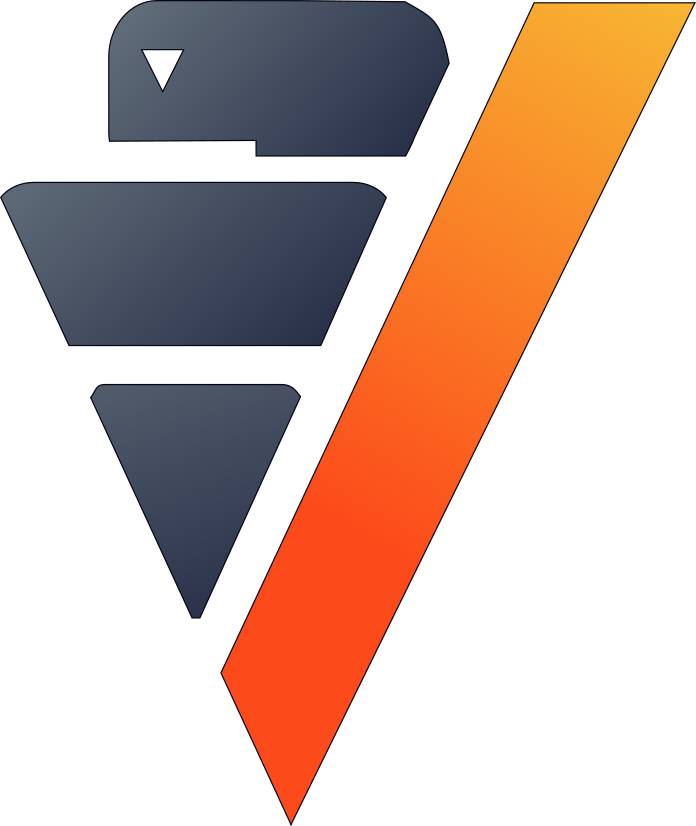

In [18]:
from verticapy.datasets import load_amazon
vdf = load_amazon()
display(vdf)

Our goal is to predict the number of forest fires in Brazil. To do this, we can draw an autocorrelation plot and a partial autocorrelation plot.

In [19]:
vdf.acf(column = "number",
        ts = "date",
        by = ["state"],
        p = 48,
        method = "pearson")

In [20]:
vdf.pacf(column = "number",
         ts = "date",
         by = ["state"],
         p = 48)

  0%|          | 0/49 [00:00<?, ?it/s]

We can see the seasonality forest fires.

It's mathematically impossible to build the perfect correlation function, but we still have several powerful functions at our disposal for finding relationships in all kinds of datasets.